In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import Model_Functions as MF
from datetime import datetime
%matplotlib inline

In [7]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(51392, 154)

In [9]:
df['Country'].value_counts().count()

201

In [10]:
df['ChangeWorld'].isnull().value_counts()

False    30935
True     20457
Name: ChangeWorld, dtype: int64

In [11]:
df['ChangeWorld'].value_counts()

Agree                9192
Somewhat agree       9060
Strongly agree       7236
Disagree             4446
Strongly disagree    1001
Name: ChangeWorld, dtype: int64

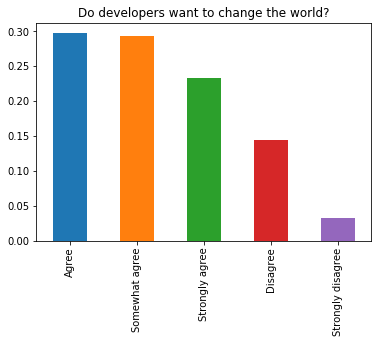

In [12]:
overpaid_vals = df['ChangeWorld'].value_counts()

(overpaid_vals/30935).plot(kind="bar");
plt.title("Do developers want to change the world?");

In [13]:
df['HaveWorkedLanguage'].isnull().value_counts()

False    36625
True     14767
Name: HaveWorkedLanguage, dtype: int64

In [14]:
df_languages = df[['Respondent', 'HaveWorkedLanguage']]
df_languages = df_languages.dropna()

In [15]:
# the following code was taken from https://gist.github.com/jlln/338b4b0b55bd6984f883.
# It splits multiple values in a column and appends it as its own row with all the other row data intact.
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [16]:
languages = splitDataFrameList(df_languages, 'HaveWorkedLanguage', "; ")

In [17]:
lang_percent = languages['HaveWorkedLanguage'].value_counts()/languages.shape[0]

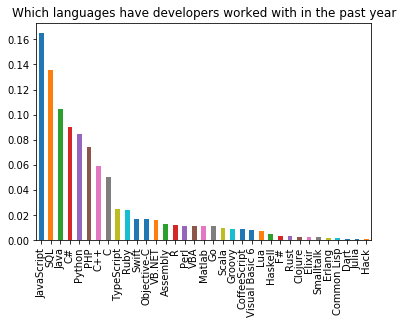

In [315]:
lang_percent.plot(kind="bar");
plt.title("Which languages have developers worked with in the past year");

In [19]:
df_languages_to_learn = df[['Respondent', 'WantWorkLanguage']]
df_languages_to_learn = df_languages_to_learn.dropna()

In [20]:
languages_to_learn = splitDataFrameList(df_languages_to_learn, 'WantWorkLanguage', "; ")

In [21]:
to_learn_percent = languages_to_learn['WantWorkLanguage'].value_counts()/languages_to_learn.shape[0]

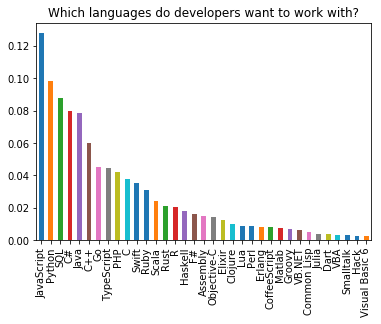

In [22]:
to_learn_percent.plot(kind="bar");
plt.title("Which languages do developers want to work with?");

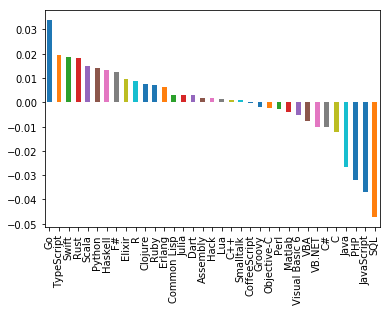

In [504]:
lang_difference = to_learn_percent - lang_percent
lang_difference = lang_difference.sort_values(ascending=False)
lang_difference.plot(kind='bar')

In [23]:
how_many_langs = (languages.groupby('Respondent').count())['HaveWorkedLanguage'].value_counts()

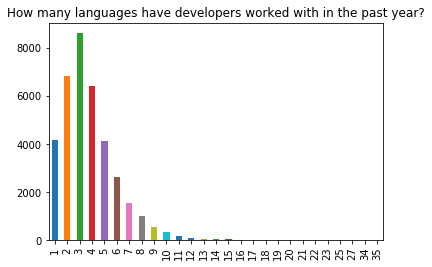

In [362]:
how_many_langs.sort_index().plot(kind="bar");
plt.title("How many languages have developers worked with in the past year?");

In [379]:
def multi_value_breakdown(df, chart_type, column, chart_title):
    # Create new dataframe for the specific column that contains multiple values in the cells
    # containing respondent and column
    df_new = df[['Respondent', column]]
    df_new = df_new.dropna()
    df_new[column].value_counts()
    
    #separate all cells that have multiple values into new rows with the respondent id
    df_new = splitDataFrameList(df_new, column, "; ")
    
    # calculate the percent of the value counts
    percent = df_new[column].value_counts()/df_new.shape[0]
    percent = percent.sort_values()
    # plot the value counts
    percent.plot(kind=chart_type);
    plt.title(chart_title);

HaveWorkedFramework


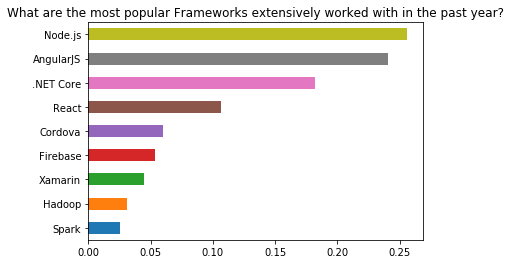

In [380]:
multi_value_breakdown(df, 'barh','HaveWorkedFramework', 
                      'What are the most popular Frameworks extensively worked with in the past year?')

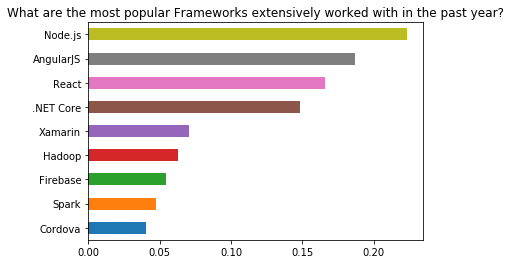

In [381]:
multi_value_breakdown(df, 'barh', 'WantWorkFramework', 
                      'What are the most popular Frameworks extensively worked with in the past year?')

HaveWorkedDatabase

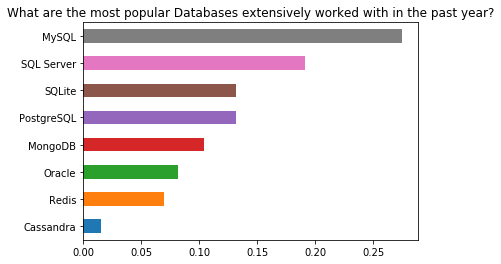

In [382]:
multi_value_breakdown(df, 'barh', 'HaveWorkedDatabase', 
                     'What are the most popular Databases extensively worked with in the past year?')

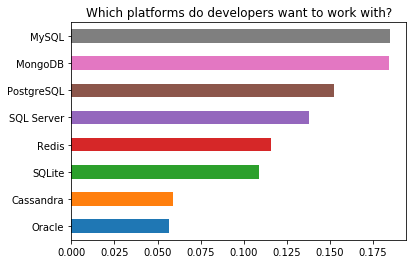

In [383]:
multi_value_breakdown(df, 'barh', 'WantWorkDatabase', 
                     'Which platforms do developers want to work with?')

HaveWorkedPlatform

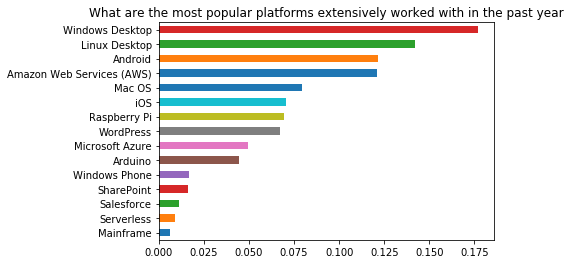

In [384]:
multi_value_breakdown(df, 'barh','HaveWorkedPlatform', 
                     'What are the most popular platforms extensively worked with in the past year')

Want to work in 

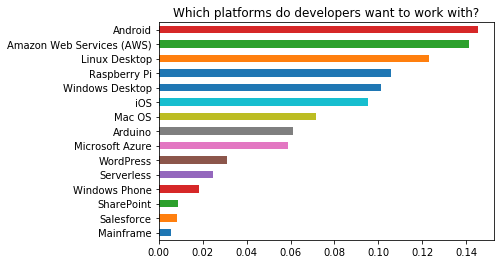

In [385]:
multi_value_breakdown(df,'barh', 'WantWorkPlatform', 
                     'Which platforms do developers want to work with?')

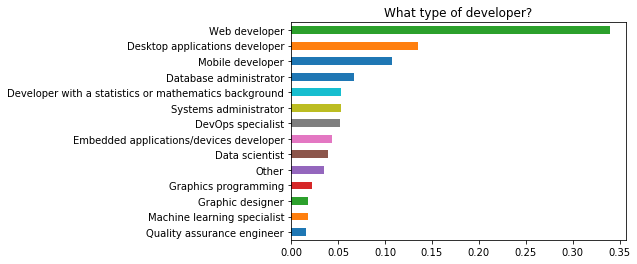

In [386]:
multi_value_breakdown(df,'barh', 'DeveloperType', 
                     'What type of developer?')

In [457]:
df_developer_type = 
df_developer_type.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary


""


Start time


In [87]:
workstart = df['WorkStart'].dropna()

In [88]:
military_time = []
for i in workstart:
    if i == 'Noon':
        military_time.append('12:00 PM')
    elif i == 'Midnight':
        military_time.append('12:00 AM')
    else:
        military_time.append(i)
        

In [89]:
military_time = pd.DataFrame(military_time)


In [90]:
military_time = military_time.rename(columns={0: "workstart"})

In [91]:
timedate = []
for i in military_time['workstart']:
    i = datetime.strptime(i, '%I:%M %p')
    timedate.append(i)

In [92]:
timedate = pd.DataFrame(timedate)


In [93]:
hours = []
timedate = timedate.rename(columns={0: "workstart"})
for i in timedate['workstart']:
    i = i.hour
    hours.append(i)
hours = pd.DataFrame(hours)  
hours = hours.rename(columns={0: "workstart"})

Text(0.5,0,'Hour (Military Time)')

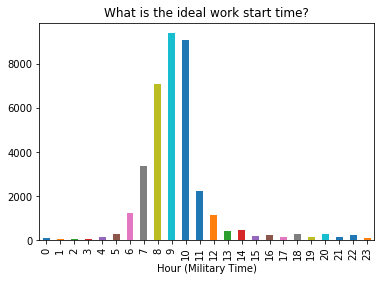

In [94]:
hours['workstart'].value_counts().sort_index().plot(kind='bar');
plt.title("What is the ideal work start time?");
plt.xlabel("Hour (Military Time)")

Section on sought after qualifications.


In [58]:
test = df['ImportantHiringAlgorithms'].value_counts()

In [109]:
# Create function that takes a list of questions and gets the value counts and plots the value counts
def count_question(questions):
    for q in questions:
        df[q].value_counts().plot(kind='bar', title=(q[15:]))
        print(q[15:], '\n', df[q].value_counts(), '\n')

In [60]:
test.loc['Important']

11852

In [189]:
df_schema = pd.read_csv('survey_results_schema.csv')

In [233]:
df_schema.head()

,Question
Column,
Respondent,Respondent ID number
Professional,Which of the following best describes you?
ProgramHobby,Do you program as a hobby or contribute to ope...
Country,In which country do you currently live?
University,"Are you currently enrolled in a formal, degree..."


In [191]:
# Make the Column column the index to better identify the question using loc
df_schema.set_index('Column', inplace=True)


In [213]:
# Figure out which text to remove to remove the question and only include the category
len("Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process?")

375

In [220]:
label = df_schema.loc['ImportantHiringAlgorithms'].Question
label[375:]

' Knowledge of algorithms and data structures'

(51392, 10)

In [429]:
def sum_answers(df, df_schema, questions):
    importance_counts = {}
    importance_percents = {}
    
    #create the dataframe for the question list
    df = df[questions]
    #remove any column with missing values
    df = df.dropna(axis=0, how='all')
    #get value counts for each question, get count that are important and not important, not counting
    # somewhat important as I will treat that as a neutral response
    for q in questions:
        values = df[q].value_counts()
        imp = (values.loc["Important"] + values.loc["Very important"])
        notimp = (values.loc["Not very important"] + values.loc["Not at all important"])
        label = df_schema.loc[q].Question
        label = label[375:]
        importance_counts[label] = imp - notimp
        importance_percents[label] = imp/df.shape[0]
    return importance_counts, importance_percents
                

In [256]:
questions = ['ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 
             'ImportantHiringOpenSource','ImportantHiringPMExp', 'ImportantHiringCompanies',
             'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 
             'ImportantHiringGettingThingsDone']

In [398]:
def importance_df(df, df_schema, questions):
    # get counts and percents for importance of a dataframe of specific questions
    importance_counts, importance_percents = sum_answers(df, df_schema, questions) 
    
    # Create data frame importance from importance count dictionary
    Importance = pd.DataFrame.from_dict(importance_counts, orient='index')
    
    # Rename column to importance
    Importance = Importance.rename(columns={0: "Importance"})
    
    # create dataframe of percents to join to other dataframe
    importance_percents = pd.DataFrame.from_dict(importance_percents, orient='index')
    
    #join to Importance dataframe
    Importance = Importance.join(importance_percents)
    
    #Rename column
    Importance = Importance.rename(columns={0: "Percentage_of_respondents"})
    
    # sorty dataframe by importance
    Importance = Importance.sort_values(by="Importance")
    
    # create a column that contains info on whether Importance is positive or negative
    Importance['Positive'] = Importance['Importance'] > 0
    
    return Importance

In [399]:
# Plot the importance of each hiring category which is the 
# sum of (Importand + Very Important) - (Not very important + Not at all important)
def plot_count(df, title, label):
    df['Importance'].plot(kind='barh', color=Importance['Positive'].map({True: 'G', False: 'r'}))
    plt.title(title);
    plt.xlabel(label);

In [417]:
# Plot percentage of respondents who think the following categories
# are important or very important to consider when hiring
def plot_percent(df, title, label):
    df['Percentage_of_respondents'].plot(kind='barh')
    plt.title(title);
    plt.xlabel(label);

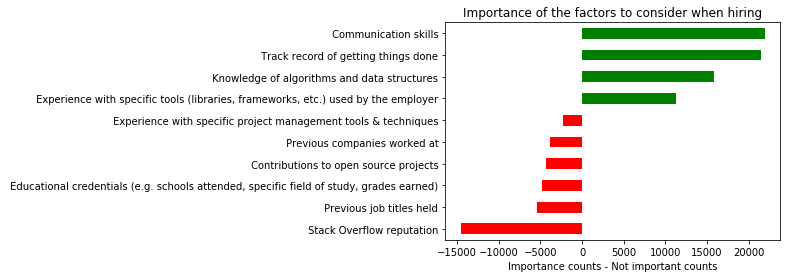

In [418]:
plot_count(Importance, "Importance of the factors to consider when hiring", 
           "Importance counts - Not important counts")

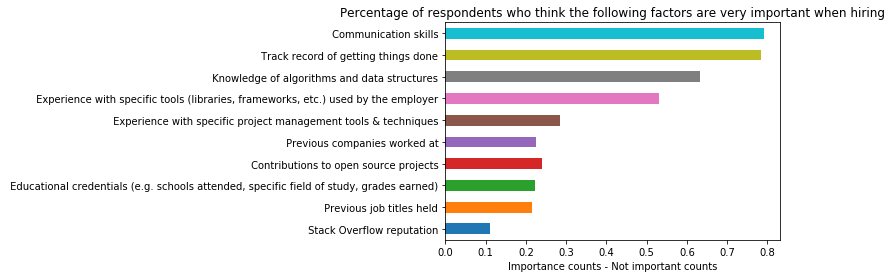

In [419]:
plot_percent(Importance, "Percentage of respondents who think the following factors are very important when hiring", 
             "Importance counts - Not important counts")

In [473]:
df_profession = df[['Professional', 'Country','ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 
             'ImportantHiringOpenSource','ImportantHiringPMExp', 'ImportantHiringCompanies',
             'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 
             'ImportantHiringGettingThingsDone']]
print(df_profession.shape)


(51392, 12)


In [472]:
df_profession = df_profession.dropna()
df_profession['over_300_responses'] = df_profession.Country.value_counts()>300
print(df_profession.shape)

AttributeError: 'DataFrame' object has no attribute 'Country'

In [464]:
df_developer = df_profession.loc[df['Professional'].isin(["Professional developer",
                                                          "Used to be a professional developer"])]
df_student = df_profession.query('Professional == "Student"')

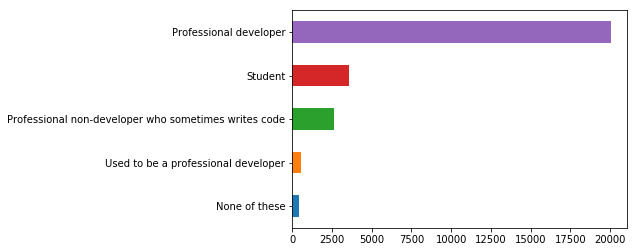

In [468]:
df_profession.Professional.value_counts().sort_values().plot(kind='barh')

In [430]:
#sum_answers(df_developer, df_schema, questions)
sum_answers(df_student, df_schema, questions)

({' Communication skills': 2500,
  ' Contributions to open source projects': 341,
  ' Educational credentials (e.g. schools attended, specific field of study, grades earned)': 51,
  ' Experience with specific project management tools & techniques': 934,
  ' Experience with specific tools (libraries, frameworks, etc.) used by the employer': 1747,
  ' Knowledge of algorithms and data structures': 2544,
  ' Previous companies worked at': -244,
  ' Previous job titles held': -251,
  ' Stack Overflow reputation': -1296,
  ' Track record of getting things done': 2590},
 {' Communication skills': 0.75968334746960697,
  ' Contributions to open source projects': 0.36867401752897938,
  ' Educational credentials (e.g. schools attended, specific field of study, grades earned)': 0.32541702007350864,
  ' Experience with specific project management tools & techniques': 0.46338705117331069,
  ' Experience with specific tools (libraries, frameworks, etc.) used by the employer': 0.61323155216284986,
  '

In [431]:
df_developers_importance = importance_df(df_developer, df_schema, questions)
df_student_importance = importance_df(df_student, df_schema, questions)

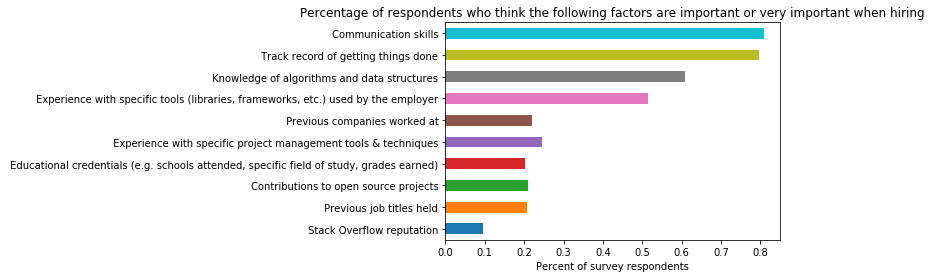

In [427]:
plot_percent(df_developers_importance, 
             "Percentage of respondents who think the following factors are important or very important when hiring",
            "Percent of survey respondents")

In [434]:
df_student_importance = df_student_importance.rename(columns={"Importance": "Student_Importance", 
                                      "Percentage_of_respondents": "Student_Percentage_of_respondents", 
                                      "Positive": "Student_Positive"})
devs_and_students_df = df_developers_importance.join(df_student_importance)
devs_and_students_df['student_percent_difference'] = devs_and_students_df['Student_Percentage_of_respondents'] - devs_and_students_df['Percentage_of_respondents']

In [435]:
devs_and_students_df.head()

,Importance,Percentage_of_respondents,Positive,Student_Importance,Student_Percentage_of_respondents,Student_Positive,student_percent_difference
Stack Overflow reputation,-11473,0.094743,False,-1296,0.165677,False,0.070934
Previous job titles held,-4445,0.206086,False,-251,0.264066,False,0.057979
Contributions to open source projects,-4439,0.210795,False,341,0.368674,True,0.157879
"Educational credentials (e.g. schools attended, specific field of study, grades earned)",-4278,0.203029,False,51,0.325417,True,0.122388
Experience with specific project management tools & techniques,-3370,0.245984,False,934,0.463387,True,0.217403


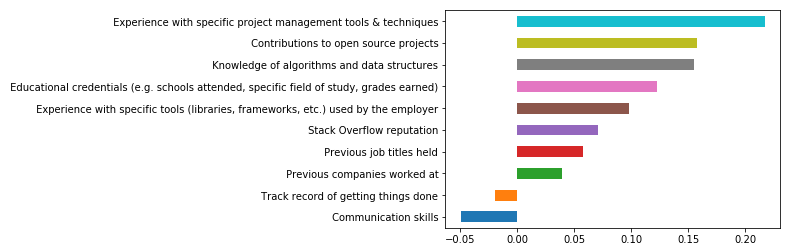

In [438]:
devs_and_students_df['student_percent_difference'].sort_values().plot(kind='barh')

/Users/mricksen/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


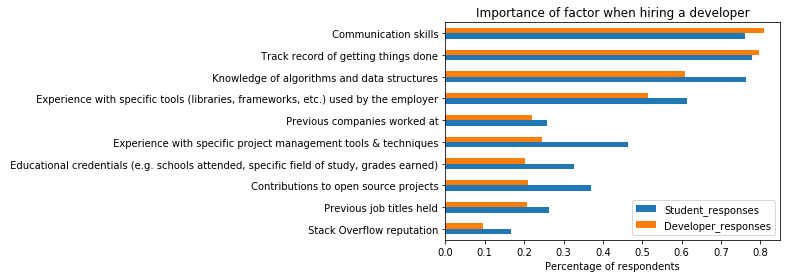

In [360]:
percent_respondents = devs_and_students_df[['Percentage_of_respondents', 'Student_Percentage_of_respondents']]
percent_respondents = percent_respondents.rename(columns={'Percentage_of_respondents': 'Developer_responses',
                                                         'Student_Percentage_of_respondents': 'Student_responses'})
percent_respondents.plot(y=['Student_responses', 'Developer_responses'],
                          kind="barh");
plt.title('Importance of factor when hiring a developer');
plt.xlabel("Percentage of respondents");

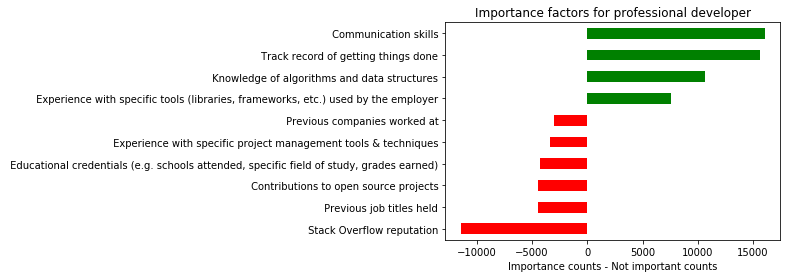

In [395]:
plot_count(df_developers_importance, "Importance factors for professional developer", 
           "Importance counts - Not important counts")
plt.savefig('professional_developer.png')

In [ ]:
Example in statement
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"): 
        return 1
    else:
        return 0
df["FormalEducation"].apply(higher_ed)[:5]

In [519]:
df_dev_years = df[['Respondent', 'Professional', 'YearsCodedJob','ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 
             'ImportantHiringOpenSource','ImportantHiringPMExp', 'ImportantHiringCompanies',
             'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 
             'ImportantHiringGettingThingsDone']]
print(df_dev_type.shape)

(22552, 13)


In [520]:
df_dev_years = df_dev_type.dropna()
df_dev_years.shape

(22552, 13)

In [523]:
dev_years = df_dev_years.YearsCodedJob.value_counts()/df_dev_type.shape[0]

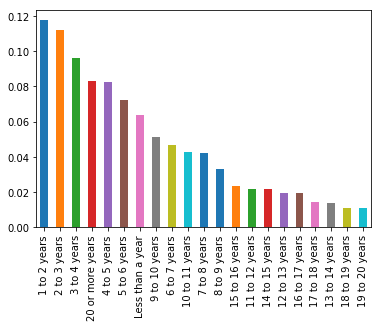

In [524]:
dev_years.plot(kind='bar')

In [530]:
df_dev_years['lessthan5years'] = df_dev_years.YearsCodedJob.isin(['Less than a year', 
                                                                      '1 to 2 years', '2 to 3 years', 
                                                                      '3 to 4 years', '4 to 5 years'])

In [532]:
dev_years_lessthan_5 = df_dev_years.query('lessthan5years == True')
dev_years_5_plus = df_dev_years.query('lessthan5years == False')

In [536]:
importance_df(dev_years_5_plus, df_schema, questions)

,Importance,Percentage_of_respondents,Positive
Stack Overflow reputation,-6758,0.084994,False
Previous job titles held,-3416,0.174863,False
Contributions to open source projects,-3057,0.188314,False
Experience with specific project management tools & techniques,-2859,0.206137,False
"Educational credentials (e.g. schools attended, specific field of study, grades earned)",-2499,0.197142,False
Previous companies worked at,-2278,0.194956,False
"Experience with specific tools (libraries, frameworks, etc.) used by the employer",4058,0.493064,True
Knowledge of algorithms and data structures,5902,0.596721,True
Track record of getting things done,9211,0.810509,True
Communication skills,9462,0.819336,True


In [537]:
importance_df(dev_years_lessthan_5, df_schema, questions)

,Importance,Percentage_of_respondents,Positive
Stack Overflow reputation,-5527,0.114666,False
"Educational credentials (e.g. schools attended, specific field of study, grades earned)",-1911,0.218823,False
Contributions to open source projects,-1476,0.247537,False
Previous job titles held,-1305,0.245754,False
Previous companies worked at,-991,0.251384,False
Experience with specific project management tools & techniques,-368,0.307873,False
"Experience with specific tools (libraries, frameworks, etc.) used by the employer",4371,0.547152,True
Knowledge of algorithms and data structures,5894,0.636202,True
Track record of getting things done,7905,0.784086,True
Communication skills,8079,0.793751,True


In [487]:
web_developer = df_dev_type.query('DeveloperType == "Web developer"')
web_developer.shape

(14755, 13)

In [505]:
web_developer = importance_df(web_developer, df_schema, questions)

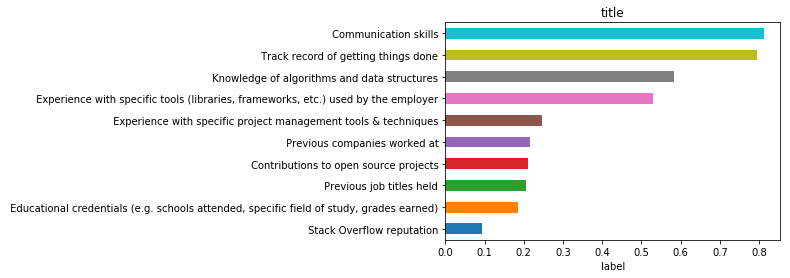

In [506]:
plot_percent(web_developer, 'title', 'label')